## 数据集载入

In [1]:
from sklearn.datasets import make_circles
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt
import numpy as np

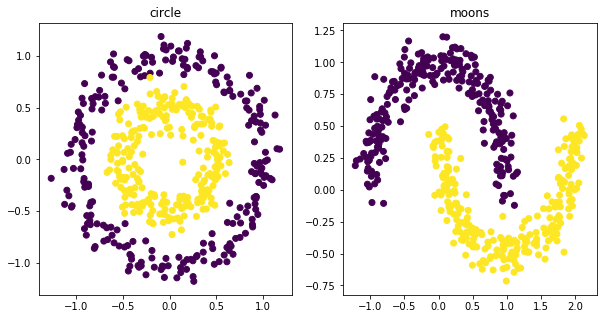

In [77]:
pointNum=500
fig = plt.figure(1,figsize=(10,5))
X1, y1 = make_circles(n_samples=pointNum, factor=0.5, noise=0.1)#返回
plt.subplot(1,2,1)
plt.title('circle')
plt.scatter(X1[:, 0], X1[:, 1], marker='o',c=y1)

plt.subplot(1,2,2)
X2, y2 = make_moons(n_samples=pointNum, noise=0.1)
plt.title('moons')
plt.scatter(X2[:, 0], X2[:, 1], marker='o',c=y2)
plt.show()

## 分别将点存为文件

In [78]:
# X1
fileInpath1 = "points1.txt"#将待分类点写入txt
fid = open(fileInpath1,'w')

for x in X1:
    s=str(x)
    s=s[1:len(s)-1]
    fid.write(s+'\n')
print('ok1')
fid.close()

ok1


In [79]:
#X2
fileInpath2 = "points2.txt"#将待分类点写入txt
fid = open(fileInpath2,'w')

for x in X2:
    s=str(x)
    s=s[1:len(s)-1]
    fid.write(s+'\n')
print('ok2')
fid.close()

ok2


 ## c++ 处理

In [121]:
# X1
import subprocess  
import os  
cppProgram = "DBSCAN.exe"

#X1
num = pointNum#这个点数得和上面的总和一样！
eps = '.185 '
MinPits='5 '

infile = fileInpath1#该文件为上面sklearn生成的点集
outfile = 'classedPoints1.txt'

cmd = cppProgram+' '+infile+' '+outfile+' '+MinPits+eps+str(num)
#print(cmd)

if os.path.exists(cppProgram):  
    rc,out= subprocess.getstatusoutput(cmd)  
   # print (rc)
   # print ('*'*10)
    print (out)

MinPits = 5  eps = 0.185 num = 500
载入点集合成功

--------------------------
操作成功,分类数量： 1


In [118]:
#X2

num = pointNum#这个点数得和上面的总和一样！
eps = '.18 '
MinPits='5 '
infile = fileInpath2#该文件为上面sklearn生成的点集
outfile = 'classedPoints2.txt'

cmd = cppProgram+' '+infile+' '+outfile+' '+MinPits+eps+str(num)
#print(cmd)

if os.path.exists(cppProgram):  
    ret,cout= subprocess.getstatusoutput(cmd)  
    print (ret)
    print (cout)

1
MinPits = 5  eps = 0.18 num = 500
载入点集合成功

--------------------------
操作成功,分类数量： 1


### 分别读文件、作图

In [122]:
#Y1
filepath = 'classedPoints1.txt'
Y1=np.zeros([num,3])
i=0
with open(filepath) as f:
  for line in f.readlines():
    # print(line)
    s=line.split(' ')
    Y1[i][0] = int(s[0])
    Y1[i][1]= float(s[1])
    Y1[i][2]= float(s[2])
   # print(Y[i])
    i+=1

    
f.close()

In [119]:
#Y2
filepath = 'classedPoints2.txt'
Y2=np.zeros([num,3])
i=0
with open(filepath) as f:
  for line in f.readlines():
    # print(line)
    s=line.split(' ')
    Y2[i][0] = int(s[0])
    Y2[i][1]= float(s[1])
    Y2[i][2]= float(s[2])
   # print(Y[i])
    i+=1

    
f.close()

## 做出分类结果图像

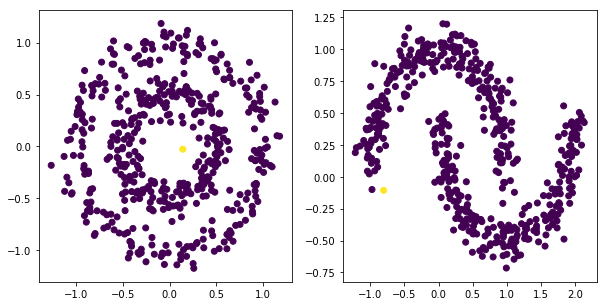

In [123]:
fig = plt.figure(2,figsize=(10,5))

plt.subplot(1,2,1)
plt.scatter(Y1[:, 1], Y1[:, 2], marker='o',c=Y1[:,0])
plt.subplot(1,2,2)
plt.scatter(Y2[:, 1], Y2[:, 2], marker='o',c=Y2[:,0])

plt.show()
#有些比较分开的点是噪声点